In [5]:
import yfinance as yf

RelNS = yf.Ticker("Reliance.NS")

data = RelNS.history(period='1y')

len(data) # Open,High,Low,Close,Volume,Dividends,Stock Splits

248

In [3]:
data.to_csv("reliance_price.csv")

In [9]:
print(RelNS.info)

{'address1': 'Maker Chambers IV', 'address2': '3rd Floor 222 Nariman Point', 'city': 'Mumbai', 'zip': '400021', 'country': 'India', 'phone': '91 22 3555 5000', 'fax': '91 22 2204 2268', 'website': 'https://www.ril.com', 'industry': 'Oil & Gas Refining & Marketing', 'industryKey': 'oil-gas-refining-marketing', 'industryDisp': 'Oil & Gas Refining & Marketing', 'sector': 'Energy', 'sectorKey': 'energy', 'sectorDisp': 'Energy', 'longBusinessSummary': 'Reliance Industries Limited engages in the hydrocarbon exploration and production, oil and chemicals, retail, and digital service businesses worldwide. It operates through Oil to Chemicals, Oil and Gas, Retail, Digital Services, and Others segments. The company offers refining and marketing products, including liquefied petroleum gas, propylene, naphtha, gasoline, jet/aviation turbine fuel, kerosine oil, diesel, sulphur, and petroleum coke. It also provides polymers, including high-density and low-density polyethylene (PE), linear low-density

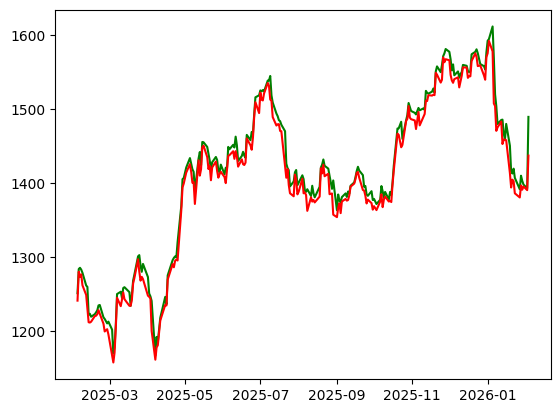

In [11]:
import matplotlib.pyplot as plt

plt.plot(data.High, c='g')
plt.plot(data.Close, c='r')

In [15]:
RelNS.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,9,25,0,1,1
1,-1m,9,25,0,1,1
2,-2m,9,25,0,1,1
3,-3m,9,26,0,1,1


In [18]:
import requests
from bs4 import BeautifulSoup

url = "https://www.moneycontrol.com/news/business/stocks/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

headlines = soup.find_all("h2")

news_list = []

for h in headlines:
    news_list.append(h.text)

news_list


["Eternal shares rise up to 10% on addition to Jefferies' India model portfolio",
 'SPARC wins USFDA priority review voucher tied to Sezaby approval',
 'Live: Sensex, Nifty jumps 2% on India-US deal optimism, Rupees firms up | Closing Bell',
 'Q3 Results impact: Bajaj Housing Finance shares surge 6%; Mobikwik, Ather Energy rally up to 19%',
 'India-US trade deal impact: Goldiam, Rajesh Exports, other gems & jewellery stocks rally up to 20%',
 'Hold Steel Authority of India; target of Rs 151: Prabhudas Lilladher',
 'Accumulate KEC International; target of Rs 748: Prabhudas Lilladher',
 'Accumulate Jindal Steel; target of Rs 1171: Prabhudas Lilladher',
 'Accumulate Vinati Organics; target of Rs 1671: Prabhudas Lilladher',
 'Accumulate LIC Housing Finance; target of Rs 525: Prabhudas Lilladher',
 'Accumulate Finolex Industries; target of Rs 199: Prabhudas Lilladher',
 'Accumulate TVS Motor Company; target of Rs 4200: Prabhudas Lilladher',
 'Dixon Tech, Kaynes, other EMS shares gain up to 

In [22]:
from moneycontrol import moneycontrol_api as mc

mc.get_news

<function moneycontrol.moneycontrol_api.get_news()>